In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("drug200.csv")
data.tail(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
180,22,F,HIGH,NORMAL,22.818,DrugY
181,59,F,NORMAL,HIGH,13.884,drugX
182,20,F,LOW,NORMAL,11.686,drugX
183,36,F,HIGH,NORMAL,15.490,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY
185,57,F,NORMAL,NORMAL,25.893,DrugY
186,70,M,HIGH,HIGH,9.849,drugB
187,47,M,HIGH,HIGH,10.403,drugA
188,65,M,HIGH,NORMAL,34.997,DrugY
189,64,M,HIGH,NORMAL,20.932,DrugY


In [17]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Get Dummies

In [19]:
data = pd.get_dummies(data=data,columns=['Sex','BP','Cholesterol'],drop_first=True)

In [20]:
data

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


## Label Encoding Target

In [21]:
# Moving target to the end
data = data[['Age','Na_to_K','Sex_M','BP_LOW','BP_NORMAL','Cholesterol_NORMAL','Drug']]
data

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,1,0,0,drugC
2,47,10.114,1,1,0,0,drugC
3,28,7.798,0,0,1,0,drugX
4,61,18.043,0,1,0,0,DrugY
...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,0,drugC
196,16,12.006,1,1,0,0,drugC
197,52,9.894,1,0,1,0,drugX
198,23,14.020,1,0,1,1,drugX


In [22]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
data['Drug'] = enc.fit_transform(data['Drug'])
data

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,0
1,47,13.093,1,1,0,0,3
2,47,10.114,1,1,0,0,3
3,28,7.798,0,0,1,0,4
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,0,3
196,16,12.006,1,1,0,0,3
197,52,9.894,1,0,1,0,4
198,23,14.020,1,0,1,1,4


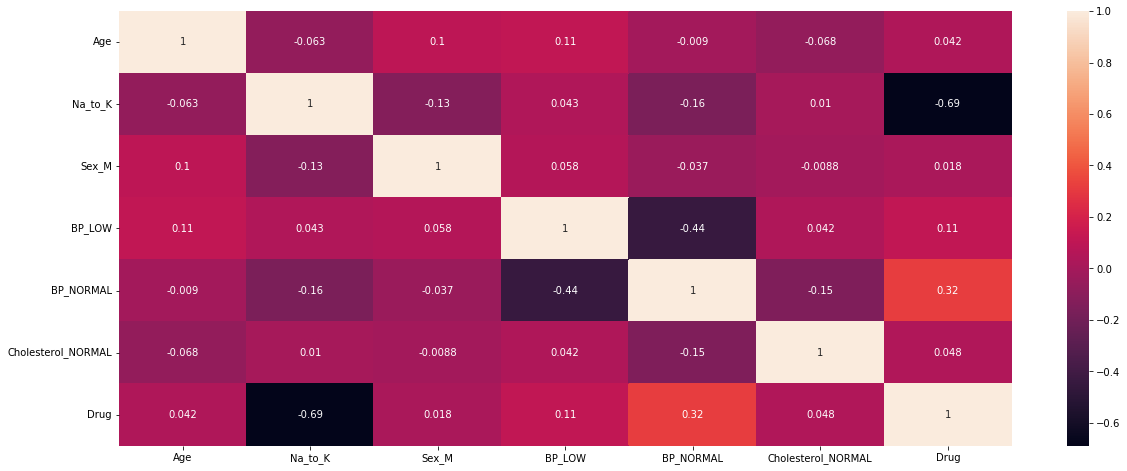

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

## Split

In [24]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
train_x,test_x,train_y,test_y = train_test_split(x,y)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
model.fit(train_x,train_y)

GaussianNB()

In [27]:
model.score(train_x,train_y)

0.8333333333333334

In [28]:
model.score(test_x,test_y)

0.82